In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')

<font size=5>**Analysis dataframe**</font>

In [3]:
df.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
df.drop('id',axis=1, inplace=True)

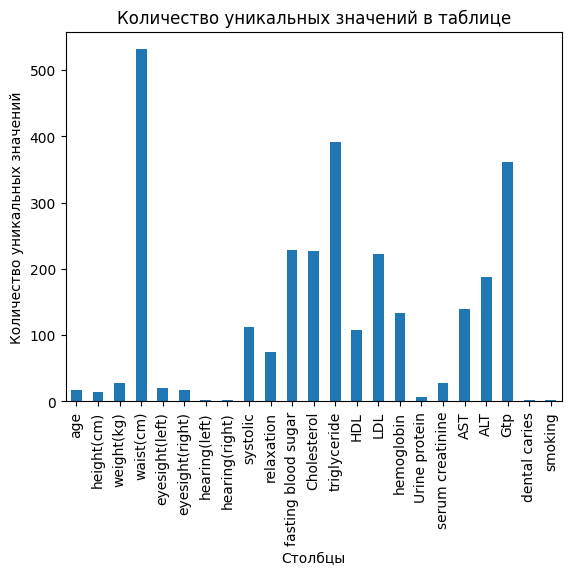

In [7]:
unique_values = df.apply(pd.Series.nunique)
unique_values.plot(kind='bar')

plt.xlabel('Столбцы')
plt.ylabel('Количество уникальных значений')
plt.title('Количество уникальных значений в таблице')
plt.show()

In [8]:
unique_values

age                     18
height(cm)              14
weight(kg)              28
waist(cm)              531
eyesight(left)          20
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
Urine protein            6
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
dtype: int64

In [9]:
cat_cols = ['hearing(left)', 'hearing(right)', 'dental caries', 'smoking']
num_cols = list(df.drop(cat_cols, axis=1).columns)

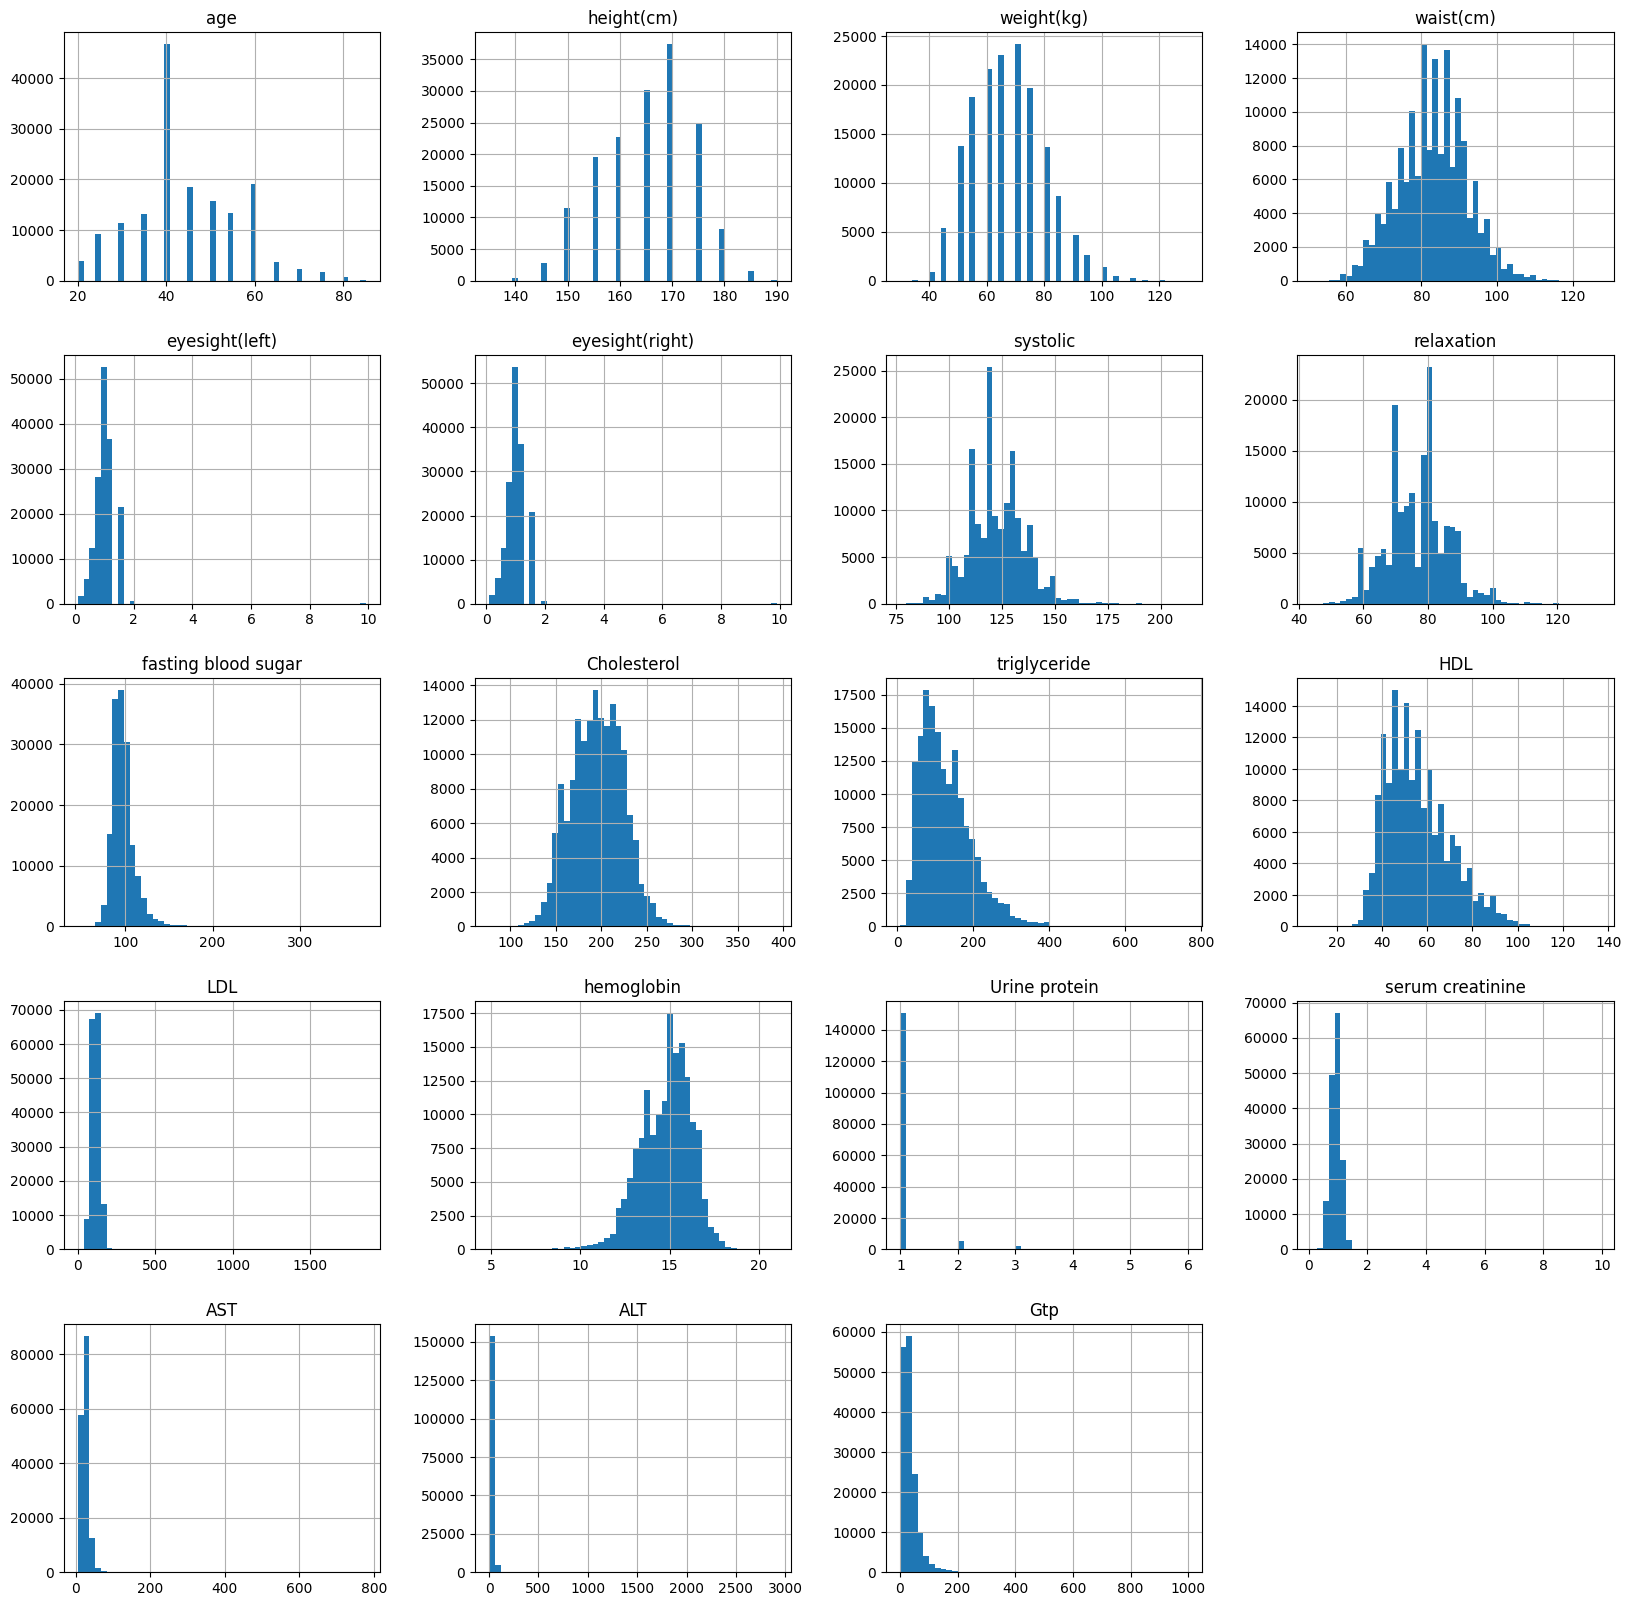

In [10]:
df[num_cols].hist(bins=50, figsize=(20,20))
plt.show()

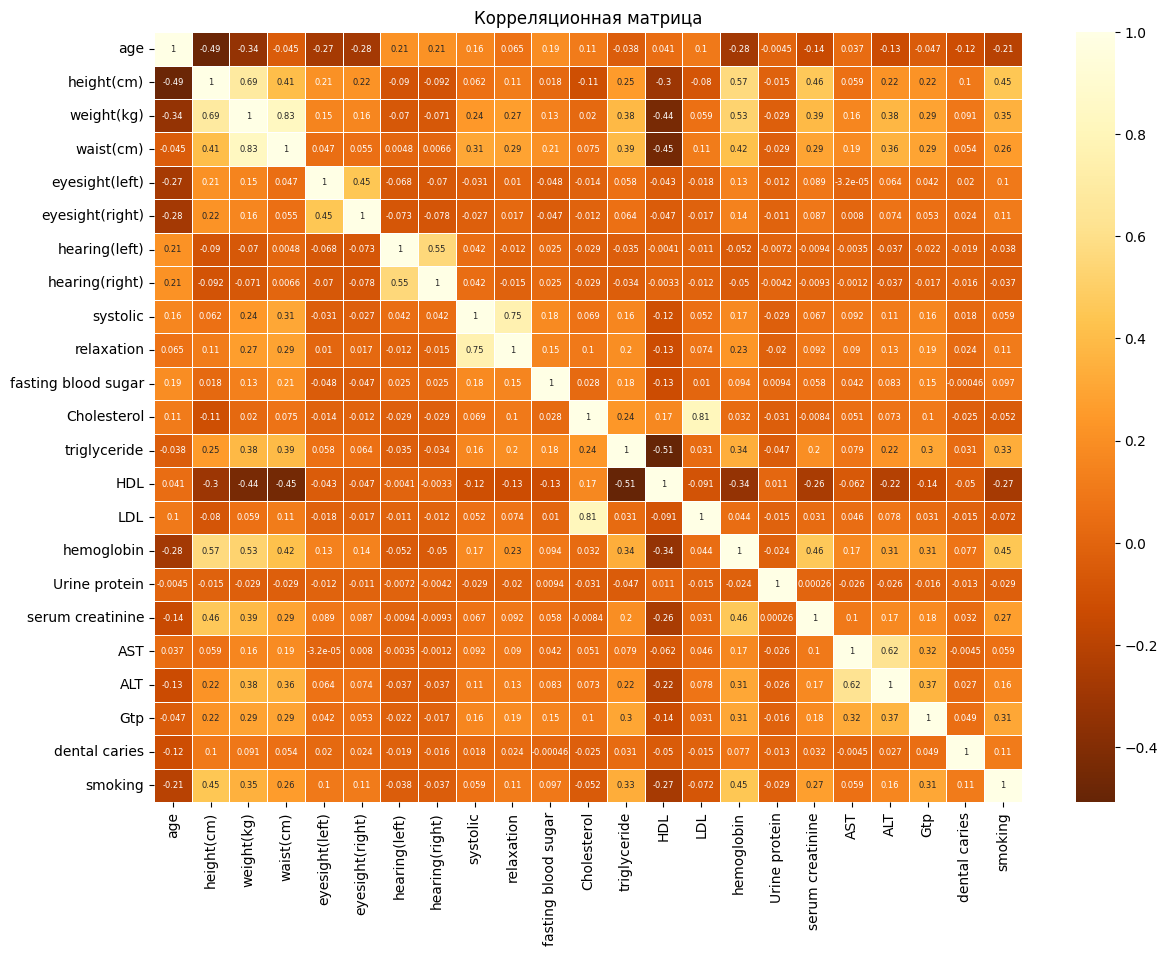

In [11]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name) -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(14, 10))
    sns.heatmap(corr, linewidths=.5, cmap='YlOrBr_r', annot=True, annot_kws={"size": 6})
    plt.title(title_name)
    plt.show()
plot_correlation_heatmap(df, 'Корреляционная матрица')

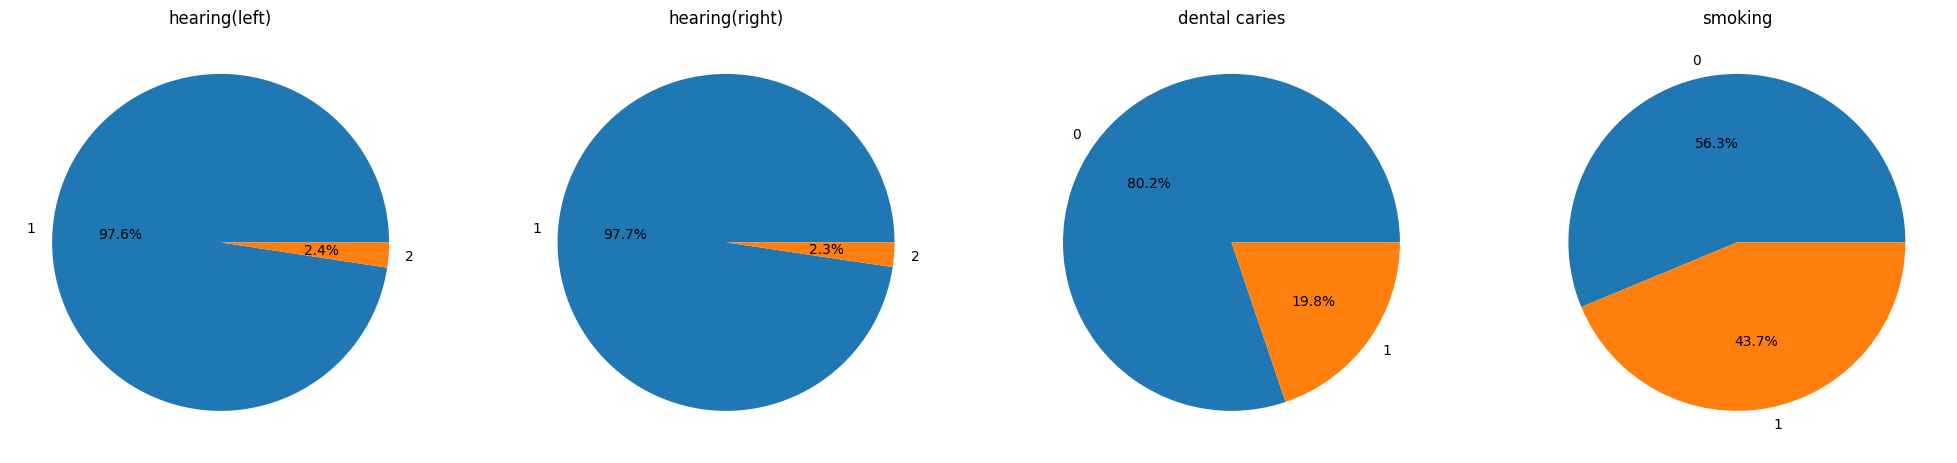

In [12]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), cat_cols):
    ax.set_title(col)
    ax.pie(df[col].value_counts(), autopct="%1.1f%%", labels=df[col].value_counts().index)

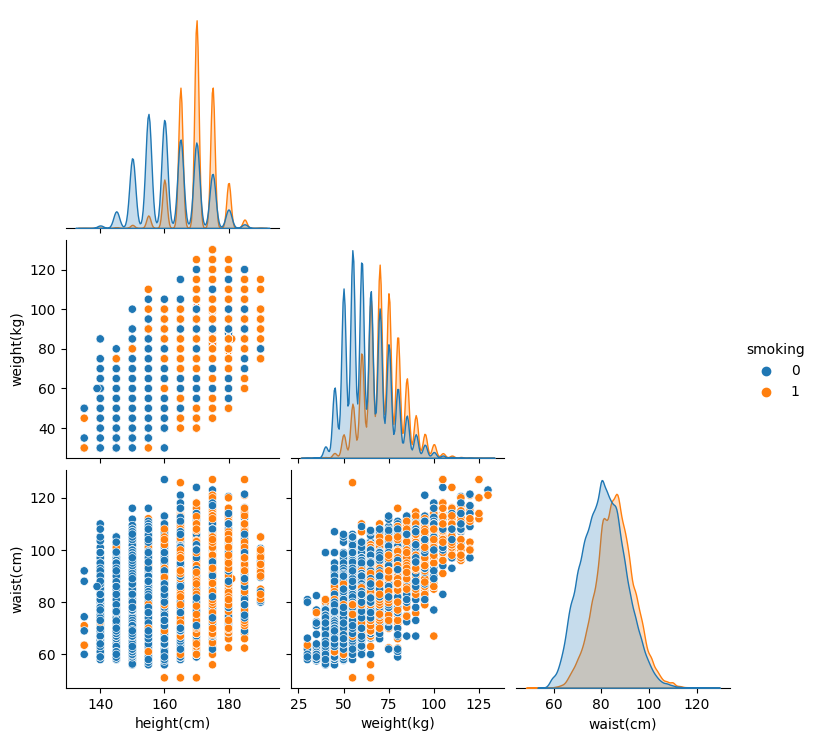

In [13]:
sns.pairplot(data = df[['height(cm)', 'weight(kg)', 'waist(cm)', 'smoking']], hue = 'smoking', corner = True);

<font size =6>**EDA**</font>

<font size=5>*Mini Feature Engineering*</font>

In [14]:
def features_generate(df):
    df['Urine proteit=1'] = df['Urine protein'].apply(lambda x : 1 if x == 1 else 0)
    df['LDL*Cholesterol'] = df['LDL']*df['Cholesterol']
    df['relaxation*systolic'] = df['relaxation']*df['systolic']
    df['IMT'] = df['weight(kg)']/((df['height(cm)']/100)**2)
    df['waist(cm)*weight(kg)'] = df['waist(cm)']*df['weight(kg)']
    df['HDL-triglyceride Ratio'] = df['HDL'] / df['triglyceride']
    df['LDL-triglyceride Ratio'] = df['LDL'] / df['triglyceride']
    df["Liver Enzyme Ratio"] = df["AST"] / df["ALT"]
    df["HDL-LDL Ratio"] = df["HDL"] / df["LDL"]
    
    alt_q = df['ALT'].quantile(q=.75)
    ast_q = df['AST'].quantile(q=.75)
    df['alt>75%q'] = df['ALT'].apply(lambda x : 1 if x > alt_q else 0)
    df['ast>75%q'] = df['AST'].apply(lambda x : 1 if x > ast_q else 0)
    df['bad_hearing?'] = df.apply(lambda row: 1 if (row['hearing(left)'] == 2) or (row['hearing(right)'] == 2) else 0, axis=1)
    df['multisight'] = df.apply(lambda row: 0 if row['eyesight(left)'] == row['eyesight(right)'] else 1, axis=1)
    return df
df = features_generate(df)
cat_cols.extend(['Urine proteit=1','alt>75%q','ast>75%q', 'bad_hearing?', 'multisight'])
num_cols.extend(['LDL*Cholesterol','relaxation*systolic', 'IMT','waist(cm)*weight(kg)',
                 'HDL-triglyceride Ratio','LDL-triglyceride Ratio' ])

In [15]:
for col in cat_cols:
    df[col] = df[col].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     159256 non-null  int64  
 1   height(cm)              159256 non-null  int64  
 2   weight(kg)              159256 non-null  int64  
 3   waist(cm)               159256 non-null  float64
 4   eyesight(left)          159256 non-null  float64
 5   eyesight(right)         159256 non-null  float64
 6   hearing(left)           159256 non-null  object 
 7   hearing(right)          159256 non-null  object 
 8   systolic                159256 non-null  int64  
 9   relaxation              159256 non-null  int64  
 10  fasting blood sugar     159256 non-null  int64  
 11  Cholesterol             159256 non-null  int64  
 12  triglyceride            159256 non-null  int64  
 13  HDL                     159256 non-null  int64  
 14  LDL                 

<font size=5>*Outlier*</font>

In [16]:
Q1 = df.quantile(q=.05)
Q3 = df.quantile(q=.95)
IQR = df.apply(stats.iqr)

data_clean = df[~((df < (Q1-2*IQR)) | (df > (Q3+2*IQR))).any(axis=1)]

data_clean.shape, df.shape

((143774, 36), (159256, 36))

In [17]:
df = data_clean

In [18]:
cat_cols.remove('smoking')

In [19]:
cat_cols

['hearing(left)',
 'hearing(right)',
 'dental caries',
 'Urine proteit=1',
 'alt>75%q',
 'ast>75%q',
 'bad_hearing?',
 'multisight']

<font size=6>**Preprocessing**</font>

In [20]:
X = df.drop('smoking', axis=1)
y = df['smoking']
y = y.astype('int')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=50)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
#          ('pca',PCA(n_components='mle', whiten=True), num_cols),
#         ('ohe',OneHotEncoder(handle_unknown='ignore'),cat_cols),
    ],
    verbose_feature_names_out = True
)

alg = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', RandomForestClassifier())
])

In [23]:
params ={
    "alg__n_estimators": [100, 200, 300, 400 , 500],   
    "alg__max_features": ['sqrt', 'log2'],                                 
    "alg__min_samples_leaf": [1, 2, 4 ,8],                     
}

In [24]:
# from sklearn.model_selection import RandomizedSearchCV

# rs = RandomizedSearchCV(
#     alg,
#     params,
#     cv=3,
#     verbose=0,
#     n_jobs=-1,
#     scoring="f1",
#     error_score='raise'
# )

# rs.fit(X_train, y_train)
# rs.best_params_

In [25]:
from catboost import CatBoostClassifier, Pool

In [26]:
boosting_params ={
    "iterations": [100, 200, 300, 400 , 500 , 1000],   
    'depth' : np.arange(1,11),
    'learning_rate': [0.01, 0.03, 0.05, 0.001,0.005]
}

In [27]:
# model_rand = CatBoostClassifier(eval_metric='F1:hints=skip_train~false',
#                                 logging_level='Silent',
#                                 early_stopping_rounds=100)
# search = model_rand.randomized_search(boosting_params, train_dataset, cv=5, plot=True, verbose=False)
# search['params']

In [28]:
# test_df = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
# test_df = features_generate(test_df)
# new_test_data = preprocessor.fit_transform(test_df)
# test_dataset = Pool(new_test_data)
# predictions = model_rand.predict_proba(test_dataset)[:, 1]

In [29]:
# submission = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
# submission['smoking'] = predictions
# submission.to_csv('submission.csv', index=False)

<font size=6>**Ensemble + Optuna**</font>

In [30]:
new_data = X

In [31]:
new_data[cat_cols] = new_data[cat_cols].astype('int')

In [32]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
test_df.drop('id', axis=1, inplace=True)
test_df = features_generate(test_df)
test_df[cat_cols] = test_df[cat_cols].astype('int')
new_test_data = test_df

In [33]:
new_data.shape, new_test_data.shape

((143774, 35), (106171, 35))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data , y, test_size=0.2, random_state=50)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
opt_lgb_params = {
                 'metric': 'binary_error',
                 'max_depth': 5,
                 'min_child_samples': 10,
                 'learning_rate': 0.045879163813688256,
                 'n_estimators': 1821,
                 'min_child_weight': 6,
                 'subsample': 0.11770708304786026,
                 'colsample_bytree': 0.49515159614595267,
                 'reg_alpha': 0.4218485459727929,
                 'reg_lambda': 0.28289526226193323
                  }

In [37]:
def objective_lgb(trial):
    params = {
        'metric': trial.suggest_categorical('metric', ['binary_error']),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 2000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
    }


    model_lgb = LGBMClassifier(seed=50,**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return accuracy_score(y_test,y_pred)

# opt_lgb = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),direction='maximize')
# opt_lgb.optimize(objective_lgb, n_trials=30,show_progress_bar=True)
# opt_lgb_params = opt_lgb.best_params

In [38]:
opt_lgb_model = LGBMClassifier(**opt_lgb_params).fit(X_train, y_train)
opt_lgb_pred = opt_lgb_model.predict_proba(new_test_data)[:, 1]

In [39]:
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 2000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
    }
    model_xgb = XGBClassifier(booster='gbtree', objective='binary:logistic',seed=50,**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return accuracy_score(y_test,y_pred)

# opt_xgb = optuna.create_study(sampler = optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner(), direction='maximize')
# opt_xgb.optimize(objective_xgb, n_trials=30,show_progress_bar=True,n_jobs=-1)

# opt_xgb_params = opt_xgb.best_params
# opt_xgb_params

In [40]:
opt_xgb_params = {
                  'n_estimators': 2048,
                  'max_depth': 9,
                  'learning_rate': 0.045,
                  'booster': 'gbtree',
                  'subsample': 0.75,
                  'colsample_bytree': 0.30,
                  'reg_lambda': 1.00,
                  'reg_alpha': 0.80,
                  'gamma': 0.80,
                  'random_state': 42,
                  'objective': 'binary:logistic',
                  'tree_method': 'gpu_hist',
                  'eval_metric': 'auc',
                  'n_jobs': -1,
                 }

In [41]:
opt_xgb_model = XGBClassifier(**opt_xgb_params).fit(X_train, y_train)
opt_xgb_pred = opt_xgb_model.predict_proba(new_test_data)[:, 1]

In [42]:
def objective_cat(trial):
    params = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
        "eval_metric": "Accuracy",
    }
    
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)
        
    model_cat = CatBoostClassifier(**params,
                                logging_level='Silent',
                                early_stopping_rounds=100,random_state=50)
    model_cat.fit(X_train, y_train)
    y_pred = model_cat.predict(X_test)
    return accuracy_score(y_test,y_pred)

# opt_cat = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction='maximize')
# opt_cat.optimize(objective_cat, n_trials=100, timeout=20000,show_progress_bar=True)
# opt_cat_params = opt_cat.best_params

In [43]:
opt_cat_params = {'objective': 'Logloss',
 'colsample_bylevel': 0.07812564196960342,
 'depth': 11,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.9991212314325296}

In [44]:
opt_cat_model = CatBoostClassifier(**opt_cat_params,logging_level='Silent').fit(X_train, y_train)
opt_cat_pred = opt_cat_model.predict_proba(new_test_data)[:, 1]

In [45]:
X = new_data
Y = y

In [46]:
voting = VotingClassifier(estimators=[
                                        ('lgbm', opt_lgb_model), 
                                        ('xgb', opt_xgb_model),
                                        ('cat', opt_cat_model)], voting='soft')
voting.fit(X,Y)

opt_voting_pred = voting.predict_proba(new_test_data)[:, 1]

In [47]:
submission_vot = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
submission_vot['smoking'] = opt_voting_pred
submission_vot.to_csv('voting_submission.csv', index=False)

<font size=6>**Out_of_Fold Ensemble**</font>

https://www.kaggle.com/code/iqmansingh/smoker-status-oof-preds-lgbm-catboost-xgb#7

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [49]:
X = df.drop('smoking', axis=1)
Y = df['smoking']
Y = y.astype('int')

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143774 entries, 0 to 159255
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     143774 non-null  int64  
 1   height(cm)              143774 non-null  int64  
 2   weight(kg)              143774 non-null  int64  
 3   waist(cm)               143774 non-null  float64
 4   eyesight(left)          143774 non-null  float64
 5   eyesight(right)         143774 non-null  float64
 6   hearing(left)           143774 non-null  object 
 7   hearing(right)          143774 non-null  object 
 8   systolic                143774 non-null  int64  
 9   relaxation              143774 non-null  int64  
 10  fasting blood sugar     143774 non-null  int64  
 11  Cholesterol             143774 non-null  int64  
 12  triglyceride            143774 non-null  int64  
 13  HDL                     143774 non-null  int64  
 14  LDL                     1

In [51]:
X = features_generate(X)
X = preprocessor.fit_transform(X)

In [52]:
X = pd.DataFrame(X)

In [53]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')

In [54]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
test_df.drop('id', axis=1, inplace=True)
test_df = features_generate(test_df)
test_df[cat_cols] = test_df[cat_cols].astype('int')
new_test_data = preprocessor.fit_transform(test_df)

In [55]:
new_test_data = pd.DataFrame(new_test_data)

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     106171 non-null  int64  
 1   height(cm)              106171 non-null  int64  
 2   weight(kg)              106171 non-null  int64  
 3   waist(cm)               106171 non-null  float64
 4   eyesight(left)          106171 non-null  float64
 5   eyesight(right)         106171 non-null  float64
 6   hearing(left)           106171 non-null  int64  
 7   hearing(right)          106171 non-null  int64  
 8   systolic                106171 non-null  int64  
 9   relaxation              106171 non-null  int64  
 10  fasting blood sugar     106171 non-null  int64  
 11  Cholesterol             106171 non-null  int64  
 12  triglyceride            106171 non-null  int64  
 13  HDL                     106171 non-null  int64  
 14  LDL                 

In [57]:
new_test_data.shape, X.shape

((106171, 25), (143774, 25))

In [58]:
SPLITS = 6
lgbm_auc_score = []
cat_auc_score = []
xgb_auc_score = []
denominator = 0

for i,(tr,val) in enumerate(RepeatedStratifiedKFold(n_splits=SPLITS, n_repeats=5).split(X,y)):
    
    print("-"*30,"FOLD",i,"-"*30)
    X_train, X_test, y_train, y_test = X.iloc[tr,:],X.iloc[val,:],Y.iloc[tr],Y.iloc[val]
    
    print("\n->","LGBM:")
    lgbmmodel = LGBMClassifier(**opt_lgb_params,device="gpu")
    lgbmmodel.fit(X_train, y_train, eval_set=[(X_test,y_test)], eval_names=["valid"],eval_metric=['auc'], early_stopping_rounds=250,verbose = 250)
    auc = roc_auc_score(y_test, lgbmmodel.predict_proba(X_test)[:,1])
    lgbm_auc_score.append(auc)
    print(f"\nFold {i} ROC_AUC of LGBM =", auc,"\n")
    if auc>=0.87:
        denominator+=1
        submission["smoking"] += lgbmmodel.predict_proba(new_test_data)[:,1]
    
    print("\n->","CAT:")
    train_dataset = Pool(data=X.iloc[tr,:],label=Y.iloc[tr])
    eval_dataset = Pool(data=X.iloc[val,:],label=Y.iloc[val])
    
    catmodel = CatBoostClassifier(**opt_cat_params,verbose=250, od_type="Iter",eval_metric="AUC",early_stopping_rounds=250)
    catmodel.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
    auc = roc_auc_score(y.iloc[val], catmodel.predict_proba(X.iloc[val,:])[:,1])
    cat_auc_score.append(auc)
    if auc>=0.87:
        denominator+=1
        submission["smoking"] += catmodel.predict_proba(new_test_data)[:,1]
    
    print("\n->","XGB:")
    xgbmodel = XGBClassifier(**opt_xgb_params,early_stopping_rounds = 250)
    xgbmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)],verbose = 250)
    
    auc = roc_auc_score(y_test, xgbmodel.predict_proba(X_test)[:,1])
    xgb_auc_score.append(auc)
    print(f"\nFold {i} ROC_AUC of XGB =", auc,"\n")
    if auc>=0.87:
        denominator+=1
        submission["smoking"] += xgbmodel.predict_proba(new_test_data)[:,1]
    
print("\n\n","-"*50,sep="")
print("CV score of LGBM is ",np.array(lgbm_auc_score).mean())
print("CV score of CAT is ",np.array(cat_auc_score).mean())
print("CV score of XGB is ",np.array(xgb_auc_score).mean())

------------------------------ FOLD 0 ------------------------------

-> LGBM:
[250]	valid's auc: 0.867925	valid's binary_error: 0.216083
[500]	valid's auc: 0.870928	valid's binary_error: 0.213078
[750]	valid's auc: 0.872545	valid's binary_error: 0.211993
[1000]	valid's auc: 0.87324	valid's binary_error: 0.210825
[1250]	valid's auc: 0.87383	valid's binary_error: 0.210491
[1500]	valid's auc: 0.873988	valid's binary_error: 0.210658

Fold 0 ROC_AUC of LGBM = 0.8738742255924606 


-> CAT:
Learning rate set to 0.103347
0:	test: 0.5000000	best: 0.5000000 (0)	total: 39.4ms	remaining: 39.3s
250:	test: 0.8658176	best: 0.8658335 (248)	total: 25.8s	remaining: 1m 16s
500:	test: 0.8677047	best: 0.8677144 (498)	total: 53s	remaining: 52.8s
750:	test: 0.8682221	best: 0.8682230 (746)	total: 1m 16s	remaining: 25.4s
999:	test: 0.8682370	best: 0.8683193 (767)	total: 1m 39s	remaining: 0us

bestTest = 0.8683192564
bestIteration = 767

Shrink model to first 768 iterations.

-> XGB:
[0]	validation_0-auc:0.811

In [59]:
submission["smoking"] = submission["smoking"]/denominator
submission.head(10)

,id,smoking
0,159256,0.687310
1,159257,0.300766
2,159258,0.619778
3,159259,0.108087
4,159260,0.501369
5,159261,0.984306
6,159262,0.690122
7,159263,0.114862
8,159264,0.247624
9,159265,0.087288


In [60]:
submission[["id","smoking"]].to_csv("Ook_submission.csv",header=True,index=False)